# Kepler's Law #


# import function #

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms
from statsmodels.compat import lzip

# load data #

In [2]:
df = pd.read_csv('/home/user/Documents/Ex01_Kepler_Regression.csv')


# Corelation plot #



In [3]:
df.corr()

,SemiMajorAxis,Volume,EscapeVelocity,Density,OrbitalPeriod
SemiMajorAxis,1.000000,0.278926,0.323329,-0.716234,0.918149
Volume,0.278926,1.000000,-0.015625,-0.153851,0.229391
EscapeVelocity,0.323329,-0.015625,1.000000,-0.687354,0.225476
Density,-0.716234,-0.153851,-0.687354,1.000000,-0.565611
OrbitalPeriod,0.918149,0.229391,0.225476,-0.565611,1.000000


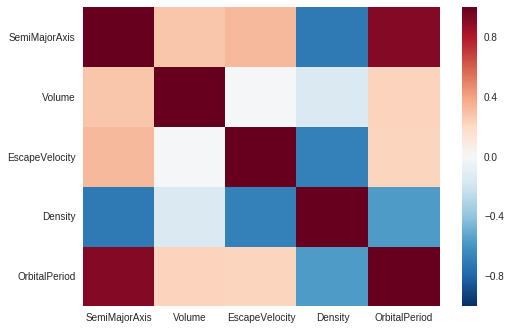

In [4]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# scatter matrix #

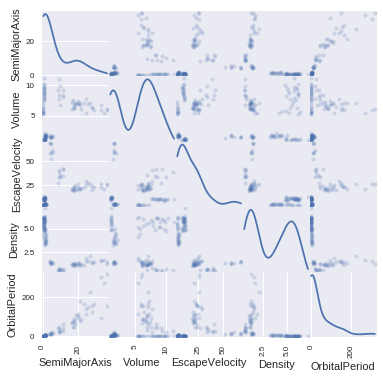

In [5]:
pd.scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde')
plt.show()

# transformation to log function #

In [6]:
df['SemiMajorAxis'] = np.log(df['SemiMajorAxis'])
df['OrbitalPeriod'] = np.log(df['OrbitalPeriod'])
df

,SemiMajorAxis,Volume,EscapeVelocity,Density,planet,OrbitalPeriod
0,-0.412333,10.236030,10.892849,6.072644,Venus,-0.802161
1,2.461425,8.132345,34.080931,0.758931,Saturn,3.700016
2,1.589867,1.538470,58.493158,1.281688,Jupiter,2.308869
3,-0.200933,8.532505,10.034185,6.129132,Venus,-0.595033
4,3.296440,7.106079,25.796580,2.108022,Neptune,5.419164
5,3.204610,5.467985,24.884934,1.920847,Neptune,4.726202
6,-0.360801,10.022764,10.050127,4.778389,Venus,-0.692857
7,3.045018,7.157667,20.691601,1.347757,Uranus,5.190706
8,0.532633,1.676122,5.537115,4.229687,Mars,0.999928
9,1.813253,1.530082,58.528652,1.346489,Jupiter,2.781105


# regression model #

In [7]:
x= df.loc[ : ,['SemiMajorAxis']]
y = df.loc[ : ,['OrbitalPeriod']]
x_train= x.iloc[0:-20,:]
y_train=y.iloc[0:-20,:]
x_test = x.iloc[-20: , :]
y_test = y.iloc[-20 : ,:]
regr = linear_model.LinearRegression()

In [8]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 1.49926441]]


# mean #

In [10]:
np.mean((regr.predict(x_test) - y_test) ** 2)

OrbitalPeriod    0.115455
dtype: float64

# plot #

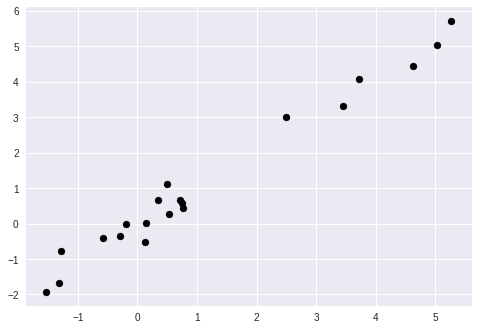

In [14]:
plt.scatter(regr.predict(x_test), y_test,  color='black')
plt.show()

# histogram plot #

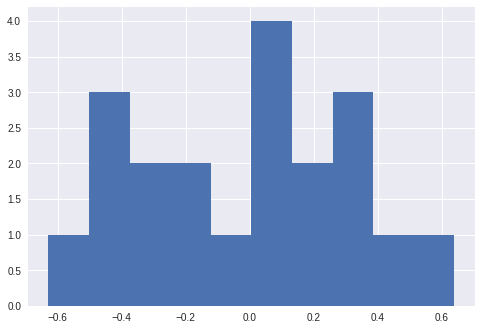

In [16]:
residue= regr.predict(x_test) - y_test
plt.hist(np.array(residue),bins=10)
plt.show()

# box plot #

In [ ]:
residue= regr.predict(x_test) - y_test
residue.plot(kind='box')
plt.show()

# calculation of p-value and F statistic #

In [ ]:
name = ['F statistic' , 'p-value']
test= sms.het_goldfeldquandt(result.resid , result.model.exog)
lzip(name,test)

# model 2 #


## working with original data ##

In [ ]:
x= df1.loc[ : ,['SemiMajorAxis']]
y = df1.loc[ : ,['OrbitalPeriod']]
x_train= x.iloc[0:-20,:]
y_train=y.iloc[0:-20,:]
x_test = x.iloc[-20: , :]
y_test = y.iloc[-20 : ,:]

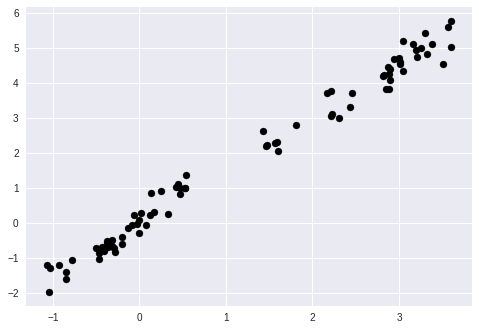

In [13]:
plt.scatter(x_train,y_train , color='black')
plt.show()


# model 3 #

## ols way ##

In [ ]:
df2 = pd.read_csv('/home/user/Documents/Ex01_Kepler_Regression.csv')
df2['SemiMajorAxis'] = np.log(df2['SemiMajorAxis'])
df2['OrbitalPeriod'] = np.log(df2['OrbitalPeriod'])

In [ ]:
train = df2[ : 80]
test = df2[80 : ]

In [ ]:
result = sm.ols(formula="OrbitalPeriod~ SemiMajorAxis",data=train).fit()

In [ ]:
predict_ols = result.predict(test)
plt.scatter(predict_ols, test['OrbitalPeriod'], color = 'r')
plt.show()
